                   id    income  expenditure
id           1.000000 -0.297891    -0.393672
income      -0.297891  1.000000     0.941814
expenditure -0.393672  0.941814     1.000000


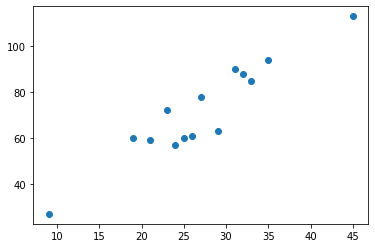

In [4]:
import numpy
from pandas import read_csv
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression

data = read_csv('linear_reg.csv')

# plot scatter
plt.scatter(data.income,data.expenditure)

print(data.corr())

model = LinearRegression()

X_train = data[['income']]
Y_train = data[['expenditure']]

In [7]:
# Model training
model.fit(X_train,Y_train)
print(model.score(X_train,Y_train))

# prediction based on trained model
y_pred = model.predict([[60],[70]])

# check intercept
a = model.intercept_[0]

# get params
b = model.coef_[0][0]
a + b*numpy.array([60,70])

0.8870135716304371


ValueError: Found input variables with inconsistent numbers of samples: [2, 14]

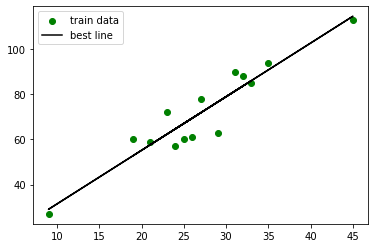

In [3]:
# plot scatter after training
plt.scatter(data.income,data.expenditure, color = 'green', label = 'train data')

# depict the best fit line
Y_train_pred = model.predict(X_train)
plt.plot(X_train, Y_train_pred, color = 'black', label = 'best line')

# output
plt.legend(loc = 2)
plt.show()

5. One of the tasks that you need to perform prior to training your machine learning model is 
data  preprocessing.  Data  cleansing  is  one  main  part  of  the  data  preprocessing  task,  and 
usually  involves  removing  rows  with  empty  values,  or  replacing  them  with  some  imputed 
values  (i.e,  handling  missing  values).  In  statistics,  imputation  is  the  process  of  replacing 
missing data with substituted values. In this exercise, you will use SimpleInputer in sklearn to 
fill the missing values of the following iris dataset.

In [8]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import numpy as np
# obtain the iris dataset, and add some missing values to it
X, y = load_iris(return_X_y=True)
mask = np.random.randint(0, 2, size=X.shape).astype(bool) 
X[mask] = np.nan # returns 2d matrix. marks each cell as True or False if nan
X_train, X_test, y_train, _ = train_test_split(X, y, test_size=100, random_state=0)


In [12]:
# https://scikit-learn.org/stable/modules/generated/sklearn.impute.SimpleImputer.html

from sklearn.impute import SimpleImputer
imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
imp_mean.fit(X_train) # Columns which only contained missing values at fit are discarded upon transform if strategy is not "constant".
new_X_train = imp_mean.transform(X_train)

imp_mean.fit(X_test) # Columns which only contained missing values at fit are discarded upon transform if strategy is not "constant".
new_X_test = imp_mean.transform(X_test)


6. Load the wine dataset in sklearn (from sklearn.datasets import load_wine) and 
split it into a training set and a test set (80% for training, and the remaining for testing). Then 
train  various  classifiers  (e.g.,  Random  Forest  classifier  and  SVM  -  any  classifiers  you  like). 
Next, try to combine classifiers to develop an ensemble using a soft or hard voting classifier. 
Try this model on the test set. Did it perform better compared to the individual classifiers? Use 
the evaluation metrics such as precision, recall and F1 score to compare the performances of 
your  models.  Discuss  and  compare  the  model  performances  with  your  peers  to  learn  their 
observations. 

In [15]:
from sklearn.datasets import load_wine
X, y = load_wine(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=80, random_state=0)


# Preprocess the data

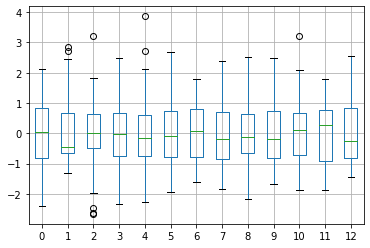

In [24]:
from sklearn.preprocessing import StandardScaler
import pandas as pd

X_train = StandardScaler().fit_transform(X_train)
X_test = StandardScaler().fit_transform(X_test)

df_X_train = pd.DataFrame(X_train)
df_X_test = pd.DataFrame(X_test)

train_boxplot = df_X_train.boxplot()


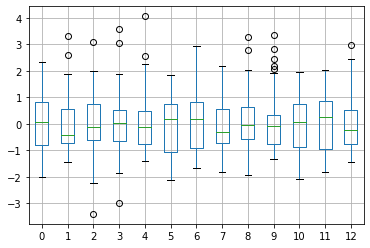

In [23]:
test_boxplot = df_X_test.boxplot()

In [34]:
# Code source: Gaël Varoquaux
#              Andreas Müller
# Modified for documentation by Jaques Grobler
# License: BSD 3 clause

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

h = 0.02  # step size in the mesh

names = [
    "Nearest Neighbors",
    "Linear SVM",
    "RBF SVM",
    "Gaussian Process",
    "Decision Tree",
    "Random Forest",
    "Neural Net",
    "AdaBoost",
    "Naive Bayes",
    "QDA",
]

classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025),
    SVC(gamma=2, C=1),
    GaussianProcessClassifier(1.0 * RBF(1.0)),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    MLPClassifier(alpha=1, max_iter=1000),
    AdaBoostClassifier(),
    GaussianNB(),
    QuadraticDiscriminantAnalysis(),
]

for name, clf in zip(names, classifiers):
    clf.fit(X_train, y_train)
    score = clf.score(X_test, y_test)
    print(f'{name}: {score}')



Nearest Neighbors: 0.9125
Linear SVM: 0.95
RBF SVM: 0.4875
Gaussian Process: 0.9625
Decision Tree: 0.8625
Random Forest: 0.9375
Neural Net: 0.975
AdaBoost: 0.9375
Naive Bayes: 0.9375
QDA: 1.0


In [63]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, VotingClassifier

clf1 = LogisticRegression(multi_class='multinomial', random_state=1)
clf2 = RandomForestClassifier(n_estimators=50, random_state=1)
clf3 = GaussianNB()

eclf1 = VotingClassifier(estimators=[('lr', clf1), ('rf', clf2), ('gnb', clf3)], voting='hard')
eclf1 = eclf1.fit(X_train, y_train)
predict= eclf1.predict(X_test)
diff = predict - y_test

print(diff)


[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0
  0  0  0 -1  0  0  0  0]
